In [5]:
import numpy as np
import cma
import matplotlib.pyplot as plt
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [6]:
#Spheres
dim = 5
alpha = 1.5 #alpha>1
h = np.array([1]+(dim-1)*[0])#np.random.rand(dim)
unit_h=h/np.linalg.norm(h)
xopt = np.array([1]+(dim-1)*[0])
def asymm_sphere(x, h, xopt, alpha):
    lam = (-np.dot(x-xopt, h)+\
           (np.dot(x-xopt, h)**2+
            (alpha**2-1)*np.linalg.norm(x-xopt)**2)**.5)/(alpha**2-1)
    return lam
fitness = lambda x: asymm_sphere(x, unit_h, xopt, alpha)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=824762, Fri Feb 14 15:13:32 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.002948859190739e+00 1.0e+00 9.13e-01  9e-01  9e-01 0:00.0
    2     16 1.464877442391068e+00 1.2e+00 8.90e-01  8e-01  9e-01 0:00.0
    3     24 1.395000361651364e+00 1.4e+00 8.37e-01  7e-01  8e-01 0:00.0
  100    800 1.686474876961748e-05 1.7e+00 4.06e-04  3e-05  3e-05 0:00.1
  200   1600 7.622262595805704e-09 2.3e+00 9.43e-07  5e-09  6e-09 0:00.2
  288   2304 5.023116294470320e-12 1.8e+00 9.79e-09  5e-12  9e-12 0:00.3
termination on tolx=1e-11 (Fri Feb 14 15:13:33 2020)
final/bestever f-value = 4.900027e-12 4.900027e-12
incumbent solution: [1.0000000000106593, 4.350266913399388e-12, 1.3228867486595415e-12, -2.891121007932704e-14, -4.227967836484697e-13]
std deviation: [6.964219230681007e-12, 5.2258190444122095e-12, 6.8079138124929496e-12, 6.51540651926081e-12, 8.905805222778464e-12]


<IPython.core.display.Javascript object>


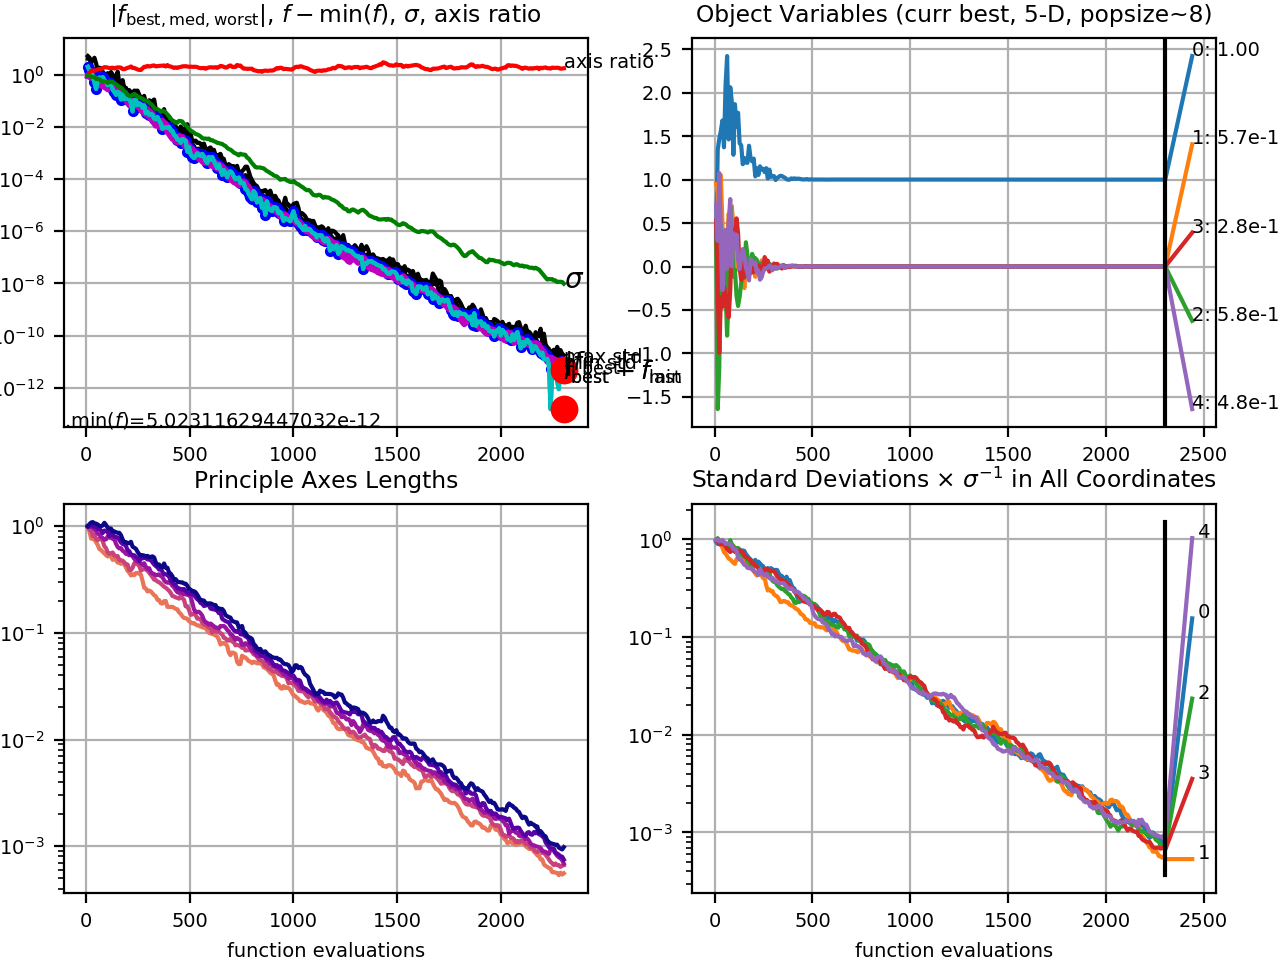

In [7]:
cma.fmin(fitness, dim*[0], 1)
cma.plot()

<IPython.core.display.Javascript object>


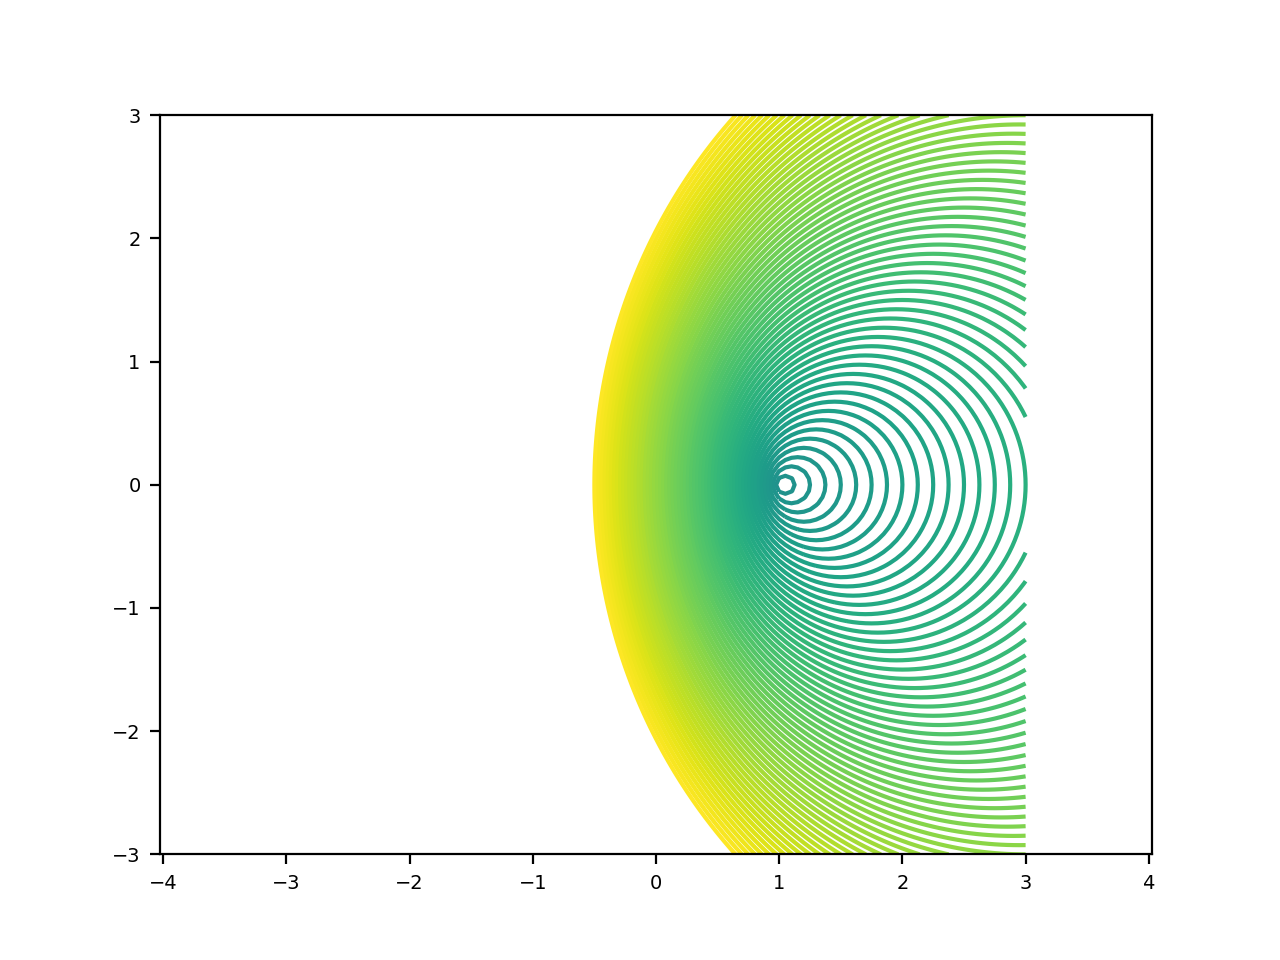

(-3.0, 2.9999999999999787, -3.0, 2.9999999999999787)

In [8]:
#2-D levelsets
dim = 2
alpha = 1.5 #alpha>1
h = np.array([1, 0])#np.random.rand(dim)
#h=h/np.linalg.norm(h)
xopt = np.array([1, 0])

delta = 0.05

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
nom = -(X-xopt[0])*h[0]-(Y-xopt[1])*h[1]+ \
       (((X-xopt[0])*h[0]+(Y-xopt[1])*h[1])**2+ \
        (alpha**2-1)*((X-xopt[0])**2+(Y-xopt[1])**2))**.5
nom/=alpha**2-1    
Z = nom
plt.figure()
plt.contour(X, Y, Z, levels = x)
plt.axis('equal')